<a href="https://colab.research.google.com/github/U23200052/DATA/blob/main/Activity2_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [3]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [ ]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [4]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-4-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [ ]:
#merged_data.dtypes

In [5]:
pollution_data = merged_data[['pm10','neighborhood']]

In [6]:
pollution_data.shape[0]

118495

In [ ]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [7]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

In [8]:
pollution_data_T =Table.from_df(pollution_data, keep_index=False)
merged_data_T =Table.from_df(merged_data, keep_index=False)#Table that contains all the data

what is the maximum pm10 value

In [9]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [10]:
pollution_data['pm10'].min()

0.0

In [11]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [12]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [13]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [14]:
joined_table.show(5)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


In [15]:
print('num of rows', joined_table.num_rows)
print('num of columns', joined_table.num_columns)

num of rows 118495
num of columns 2


In [54]:
# Identify and count missing values in the 'pm10' column
temp = joined_table.where('pm10', are.equal_to(np.nan))
print('num of rows with missing pm10:', temp.num_rows)

# Identify and count missing values in the 'neighborhood' column
temp = joined_table.where('neighborhood', are.equal_to(np.nan))
print('num of rows with missing neighborhood:', temp.num_rows)

# Remove rows where 'pm10' has missing values (NaN)
joined_table = joined_table.where('pm10', are.not_equal_to(np.nan))

# Remove rows where 'neighborhood' has missing values (NaN)
joined_table = joined_table.where('neighborhood', are.not_equal_to(np.nan))


num of rows with missing pm10: 0
num of rows with missing neighborhood: 0


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [17]:

merged_data_T.show(2)

SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,geometry,index_right,neighborhood,boroughCode,borough,@id
NYCP1_01A,1579618560,40.8472,-73.8701,23,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.3,15.2,1.44,5.91,11.35,POINT (-73.870087 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,18,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.2,15.1,1.05,1.18,1.18,POINT (-73.870094 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park


In [55]:
# Function to calculate and print summary statistics for a given column
def summary_stats(name, column):
    print(f"{name:<12} | Mean: {np.mean(column):>8.2f} | Median: {np.median(column):>8.2f} | Min: {np.min(column):>8.2f} | Max: {np.max(column):>8.2f}")


# Print a centered title for the summary statistics
print(f"\n{'Summary Statistics':^80}\n")
# Print table headers with proper alignment for better readability
print(f"{'Mean':>24} {'Median':>17} {'Min':>16} {'Max':>16}")
print("-" * 80)
# Display summary statistics for each variable (Temperature, Humidity, PM2.5)
summary_stats('Temperature', merged_data_T["temperature"])
summary_stats('Humidity', merged_data_T["humidity"])
summary_stats('PM2.5', merged_data_T["pm25"])



                               Summary Statistics                               

                    Mean            Median              Min              Max
--------------------------------------------------------------------------------
Temperature  | Mean:     8.24 | Median:     7.20 | Min:    -7.90 | Max: 10471.00
Humidity     | Mean:    50.15 | Median:    46.20 | Min:     0.00 | Max:   104.20
PM2.5        | Mean:     7.37 | Median:     3.02 | Min:     0.00 | Max:  3267.02


In [46]:
# Select only the 'borough' and 'pm25' columns from the merged dataset
new=merged_data_T.select('borough','pm25')
# Group the data by 'borough' and compute the mean of 'pm25' for each borough
new = new.group('borough', np.mean)
new

borough,pm25 mean
Bronx,7.795
Brooklyn,1.99695
Manhattan,2.37332
Queens,2.07253


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

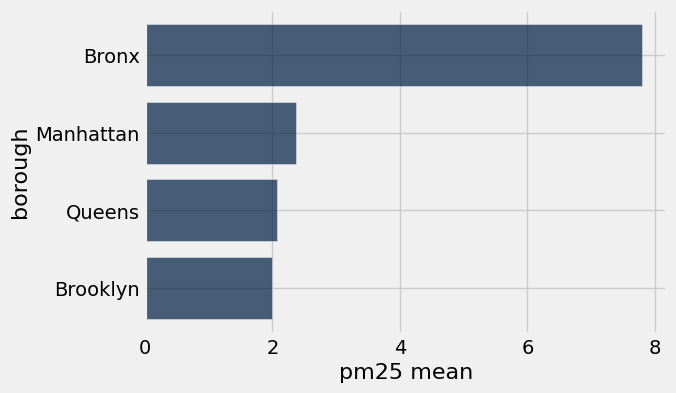

In [47]:
# Sort the grouped data by 'pm25 mean' in descending order
# (highest average PM2.5 concentration first)
# Create a horizontal bar chart to visualize PM2.5 levels across boroughs

new.sort('pm25 mean', descending=True).barh('borough')

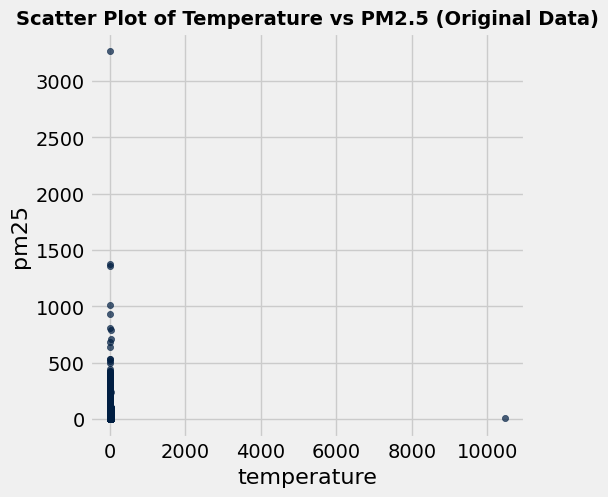

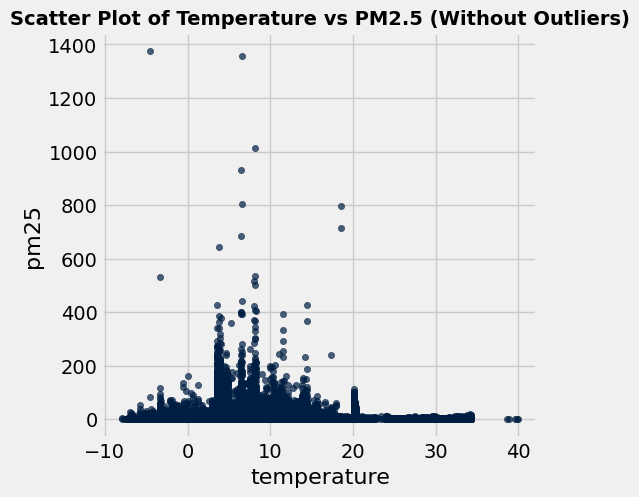

In [56]:
# Scatter plot for original data (Temperature vs. PM2.5)
merged_data_T.scatter('temperature', 'pm25')
plt.title("Scatter Plot of Temperature vs PM2.5 (Original Data)", fontsize=14, fontweight='bold')
plt.show()

# Remove extreme outliers based on reasonable thresholds
# Filtering out rows where 'temperature' is below 10,000 and 'pm25' is below 2,000
no_outlier = merged_data_T.where('temperature', are.below(10000)).where('pm25', are.below(2000))

# Scatter plot for cleaned data (without extreme outliers)
no_outlier.scatter('temperature', 'pm25')
plt.title("Scatter Plot of Temperature vs PM2.5 (Without Outliers)", fontsize=14, fontweight='bold')
plt.show()


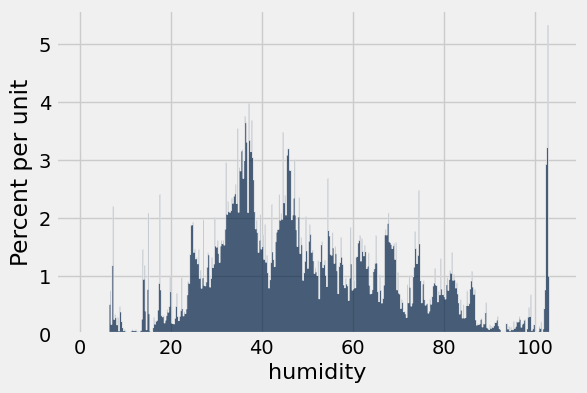

In [57]:
# Select only the 'neighborhood' and 'humidity' columns from merged_data_T
temp = merged_data_T.select('neighborhood', 'humidity')

# Plot a histogram of 'humidity' with 500 bins for detailed distribution analysis
merged_data_T.hist('humidity', bins=500)


# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [58]:
# Function to categorize PM2.5 levels based on air quality standards
def calculate_pm25_category(pm25):
    if pm25 < 12:
        return "Good"  # Low pollution level, considered safe
    elif pm25 < 35:
        return "Moderate"  # Acceptable air quality with minor concerns for sensitive individuals
    else:
        return "Unhealthy"  # High pollution level, potentially harmful to health

# Apply the function to the 'pm25' column to create a new categorical column 'PM25_Category'
merged_data_T = merged_data_T.with_column('PM25_Category', merged_data_T.apply(calculate_pm25_category, 'pm25'))

# Group the dataset by 'PM25_Category' to count occurrences in each category
merged_data_T.group('PM25_Category')


PM25_Category,count
Good,101851
Moderate,12651
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [60]:
# Initialize an empty list to store the mean PM2.5 values from each sample
pm25 = []

# Calculate the sample size as 10% of the total dataset
sample_size = int(0.1 * merged_data_T.num_rows)

# Perform 100 iterations of random sampling and mean calculation
for _ in range(100):
    # Randomly sample 10% of the dataset without replacement
    sample_data = merged_data_T.sample(k=sample_size, with_replacement=False)

    # Compute the mean PM2.5 value for the sampled data
    mean = np.mean(sample_data.column('pm25'))

    # Store the mean value in the pm25 list
    pm25.append(mean)


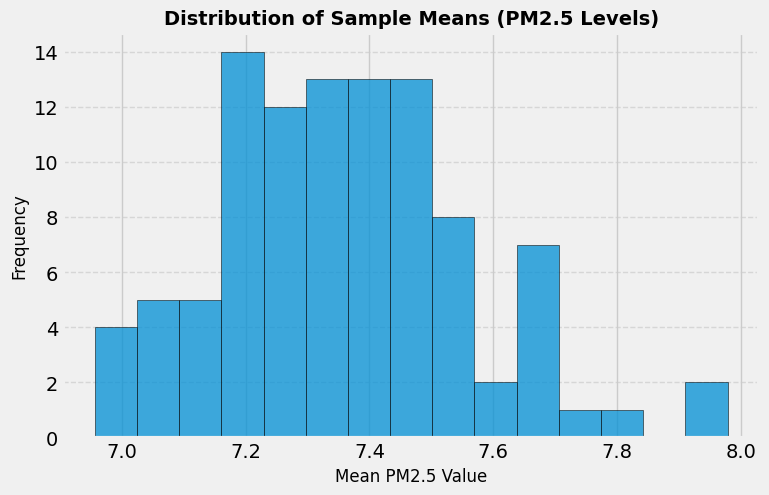

In [63]:
# Plot histogram of sample means

plt.figure(figsize=(8, 5))  # Set figure size for better visualization
plt.hist(pm25, bins=15, edgecolor="black", alpha=0.75)  # Histogram with outlined bins
plt.title("Distribution of Sample Means (PM2.5 Levels)", fontsize=14, fontweight="bold")
plt.xlabel("Mean PM2.5 Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.show()

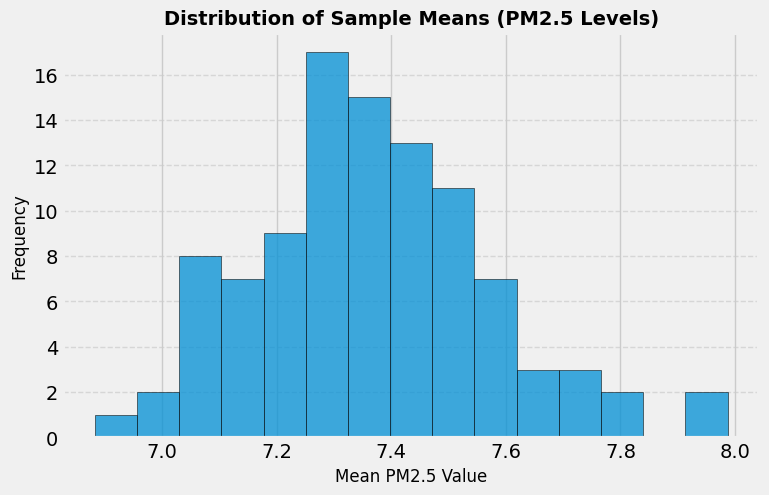

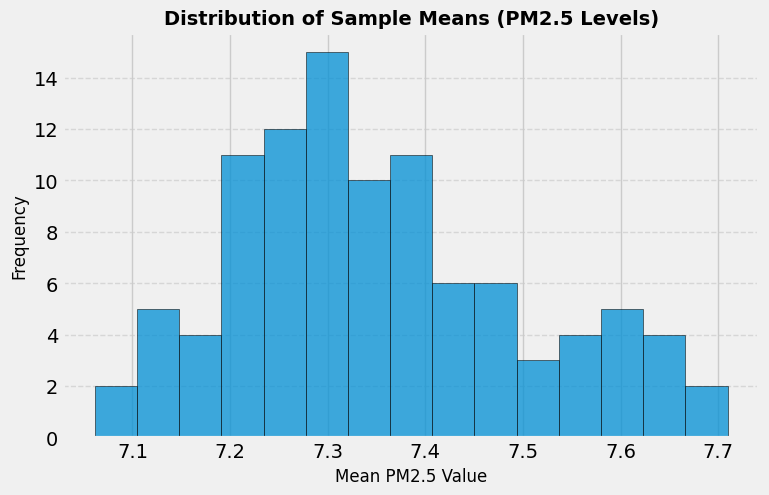

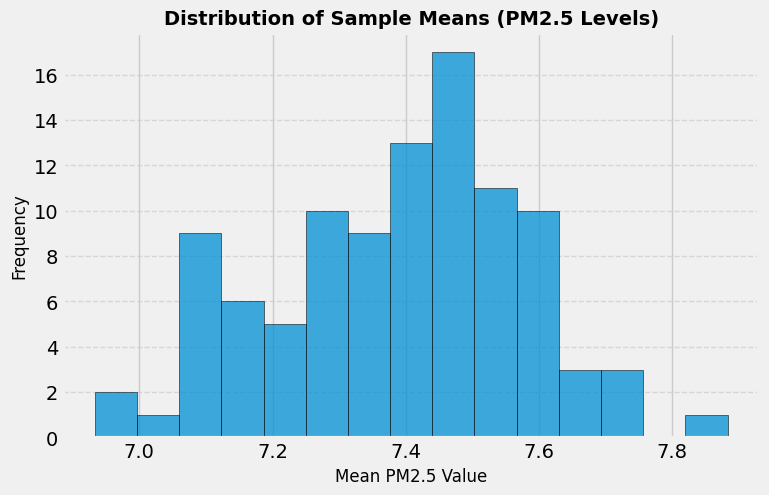

In [59]:
# NOTE: This function was created to repeatedly perform random sampling
# and visualize the distribution of sample means multiple times.
# It allows for repeated execution without rewriting code.
def simulation():
    """
    This function performs a simulation:
    - Samples 10% of the dataset 100 times (without replacement).
    - Computes the mean PM2.5 value for each sample.
    - Plots the distribution of these means in a histogram.
    """

    pm25_means = []  # List to store sample means
    sample_size = int(0.1 * merged_data_T.num_rows)  # 10% of total rows

    # Perform 100 iterations of random sampling and mean calculation
    for _ in range(100):
        sample_data = merged_data_T.sample(k=sample_size, with_replacement=False)  # Sample without replacement
        mean = np.mean(sample_data.column('pm25'))  # Compute mean of PM2.5 values
        pm25_means.append(mean)  # Store mean in list

    # Plot histogram of sample means
    plt.figure(figsize=(8, 5))  # Set figure size for better visualization
    plt.hist(pm25_means, bins=15, edgecolor="black", alpha=0.75)  # Histogram with outlined bins
    plt.title("Distribution of Sample Means (PM2.5 Levels)", fontsize=14, fontweight="bold")
    plt.xlabel("Mean PM2.5 Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
    plt.show()

# Run the simulation function multiple times
simulation()
simulation()
simulation()



# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.